In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Connection parameters
dbname = 'postgres'
user = 'postgres'
password = 'postgres'
host = 'localhost'
port = '5432'
# Establish a connection
try:
    connection = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
    print("Connection established successfully!")
except Exception as e:
    print("Error: Unable to connect to the database:", e)

Connection established successfully!


In [3]:
# query to fetch data
query = "SELECT * FROM xdr_data;"
cursor = connection.cursor()
cursor.execute(query)

In [4]:
import sys
sys.path.append('/home/addisu/Desktop/10 academy/Telecom/Script')
from user_overview_analysis import fetch_data_into_dataframe, check_missing_values,get_column_names, preprocess_data,analyze_handsets,boxplot_for_outliers, fix_outliers

In [5]:


# Call the fetch_data_into_dataframe function with a cursor object
df = fetch_data_into_dataframe(cursor)

# Call the check_missing_values function with the DataFrame
check_missing_values(df)

# Call the get_column_names function with a cursor object
get_column_names(cursor)



Missing values per column:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [6]:
df.shape

(150001, 55)

In [7]:

# # # Fetch the data into a DataFrame
# # columns = [desc[0] for desc in cursor.description]
# # data = cursor.fetchall()
# df = pd.DataFrame(data, columns=columns)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


# Get column names from the whole table
columns = cursor.fetchall()
print("Columns from the whole table:")
for column in columns:
    print(column[0])
# finally:
    # cursor.close()

# Close connection
# connection.close()

Missing values per column:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [8]:
df.shape

(150001, 55)

In [9]:
cleaned_df = preprocess_data(df)

Percentage of missing values per column:
 Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL TP > 

In [10]:

# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().mean() * 100).round(2)
print("Percentage of missing values per column:\n", missing_percent)


Percentage of missing values per column:
 Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL TP > 

In [11]:

# Drop columns missing values more than 30 percent excluding TCP DL Retrans. Vol (Bytes)" and "TCP UL Retrans. Vol (Bytes)


# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().mean() * 100).round(2)

# Identify columns with more than 30% missing values, excluding "TCP DL Retrans. Vol (Bytes)" and "TCP UL Retrans. Vol (Bytes)"
columns_to_drop = missing_percent[(missing_percent > 30) & (~missing_percent.index.isin(["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)"]))].index.tolist()
df_filtered = df.drop(columns=columns_to_drop, axis=1)

# Print the column names of the filtered DataFrame
print("Column names after removing columns with more than 30% missing values:")
print(df_filtered.columns)

# Print the number of columns left
print(f"Number of columns left after removing those with more than 30% missing values: {len(df_filtered.columns)}")





Column names after removing columns with more than 30% missing values:
Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
  

In [12]:

# Forward fill only the specified columns
columns_to_fill = ["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "Avg RTT DL (ms)", "Avg RTT UL (ms)"]
df_filtered[columns_to_fill] = df_filtered[columns_to_fill].fillna(method='ffill', axis=0)

# Calculate the percentage of missing values for each column after filling
missing_percent_after_fill = (df_filtered.isnull().mean() * 100).round(2)
print("Percentage of missing values for each column after forward fill:")
print(missing_percent_after_fill)


Percentage of missing values for each column after forward fill:
Bearer Id                         0.66
Start                             0.00
Start ms                          0.00
End                               0.00
End ms                            0.00
Dur. (ms)                         0.00
IMSI                              0.38
MSISDN/Number                     0.71
IMEI                              0.38
Last Location Name                0.77
Avg RTT DL (ms)                   0.00
Avg RTT UL (ms)                   0.00
Avg Bearer TP DL (kbps)           0.00
Avg Bearer TP UL (kbps)           0.00
TCP DL Retrans. Vol (Bytes)       0.00
TCP UL Retrans. Vol (Bytes)       0.01
DL TP < 50 Kbps (%)               0.50
50 Kbps < DL TP < 250 Kbps (%)    0.50
250 Kbps < DL TP < 1 Mbps (%)     0.50
DL TP > 1 Mbps (%)                0.50
UL TP < 10 Kbps (%)               0.53
10 Kbps < UL TP < 50 Kbps (%)     0.53
50 Kbps < UL TP < 300 Kbps (%)    0.53
UL TP > 300 Kbps (%)              0.53

In [13]:
# Drop all rows with missing values and save it to cleaned_data.csv

# Drop all missing rows
df_filtered_cleaned = df_filtered.dropna()
# Save the resulting DataFrame to a CSV file
# df_filtered_cleaned.to_csv('cleaned_data.csv', index=False)
# Print the resulting DataFrame after dropping missing rows
print(df_filtered_cleaned)
print("The cleaned DataFrame has been saved to 'cleaned_data.csv'.")



           Bearer Id            Start  Start ms              End  End ms  \
9       1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   
10      7.277826e+18  4/15/2019 10:30      90.0   4/25/2019 6:14   775.0   
11      1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
12      1.311448e+19  4/15/2019 12:20     729.0   4/25/2019 8:40   862.0   
14      1.304243e+19   4/16/2019 0:35     909.0   4/25/2019 0:40   284.0   
...              ...              ...       ...              ...     ...   
149995  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
9        864482.0  2.08

In [14]:
# Calculate the percentage of missing values for each column
missing_percent = (df_filtered_cleaned.isnull().mean() * 100).round(2)
print("Percentage of missing values per column:\n", missing_percent)

Percentage of missing values per column:
 Bearer Id                         0.0
Start                             0.0
Start ms                          0.0
End                               0.0
End ms                            0.0
Dur. (ms)                         0.0
IMSI                              0.0
MSISDN/Number                     0.0
IMEI                              0.0
Last Location Name                0.0
Avg RTT DL (ms)                   0.0
Avg RTT UL (ms)                   0.0
Avg Bearer TP DL (kbps)           0.0
Avg Bearer TP UL (kbps)           0.0
TCP DL Retrans. Vol (Bytes)       0.0
TCP UL Retrans. Vol (Bytes)       0.0
DL TP < 50 Kbps (%)               0.0
50 Kbps < DL TP < 250 Kbps (%)    0.0
250 Kbps < DL TP < 1 Mbps (%)     0.0
DL TP > 1 Mbps (%)                0.0
UL TP < 10 Kbps (%)               0.0
10 Kbps < UL TP < 50 Kbps (%)     0.0
50 Kbps < UL TP < 300 Kbps (%)    0.0
UL TP > 300 Kbps (%)              0.0
Activity Duration DL (ms)         0.0
Activity

## Handling OUtliers

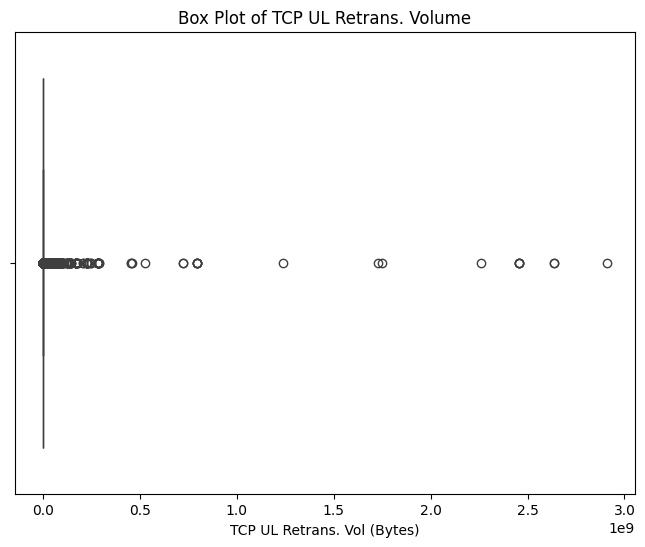

In [15]:
boxplot_for_outliers(df_filtered_cleaned, 'TCP UL Retrans. Vol (Bytes)', 'Box Plot of TCP UL Retrans. Volume', )


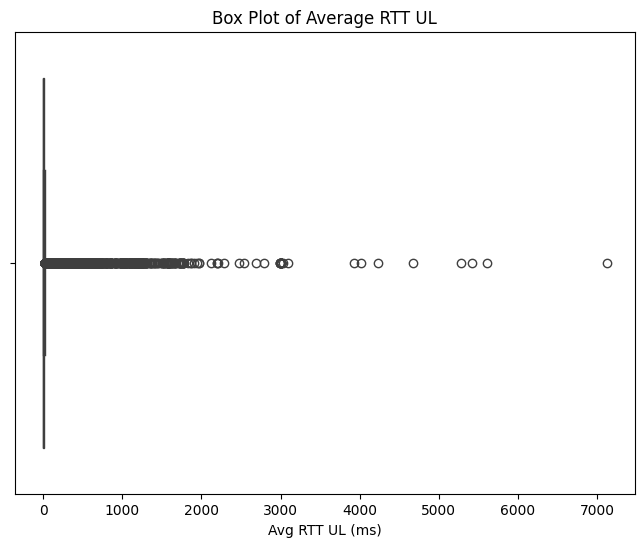

In [16]:
boxplot_for_outliers(df_filtered_cleaned, 'Avg RTT UL (ms)', 'Box Plot of Average RTT UL')


In [ ]:
#Filling the outliers in numerical columns with upper and lower bounds
df_final_cleaned=fix_outliers(df_filtered_cleaned)
# final_cleaned_data.shape

In [32]:
df_final_cleaned.shape

(146882, 47)

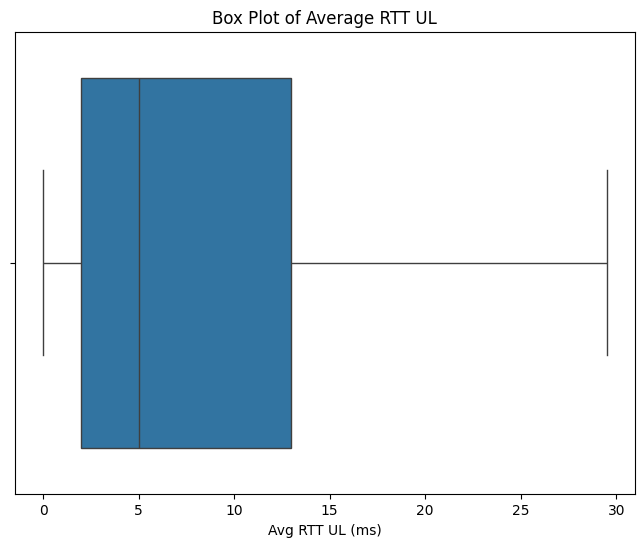

In [33]:
boxplot_for_outliers(df_final_cleaned, 'Avg RTT UL (ms)', 'Box Plot of Average RTT UL')


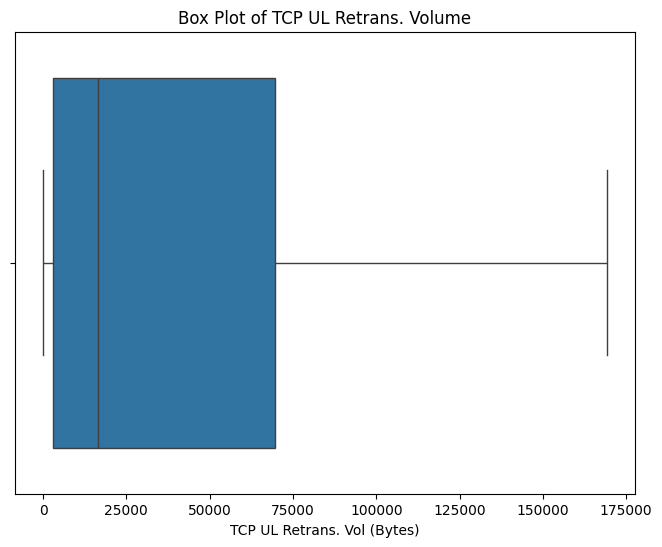

In [34]:
boxplot_for_outliers(df_final_cleaned, 'TCP UL Retrans. Vol (Bytes)', 'Box Plot of TCP UL Retrans. Volume', )


In [35]:
# Save the resulting DataFrame to a CSV file
df_final_cleaned.to_csv('../data/cleaned_data.csv', index=False)
# Print the resulting DataFrame after dropping missing rows
print(df_final_cleaned)
print("The cleaned DataFrame has been saved to 'cleaned_data.csv'.")

           Bearer Id            Start  Start ms              End  End ms  \
9       1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   
10      7.277826e+18  4/15/2019 10:30      90.0   4/25/2019 6:14   775.0   
11      1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
12      1.311448e+19  4/15/2019 12:20     729.0   4/25/2019 8:40   862.0   
14      1.304243e+19   4/16/2019 0:35     909.0   4/25/2019 0:40   284.0   
...              ...              ...       ...              ...     ...   
149995  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
9        245071.0  2.08

Top 10 handsets used by the customers:
Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8817
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64


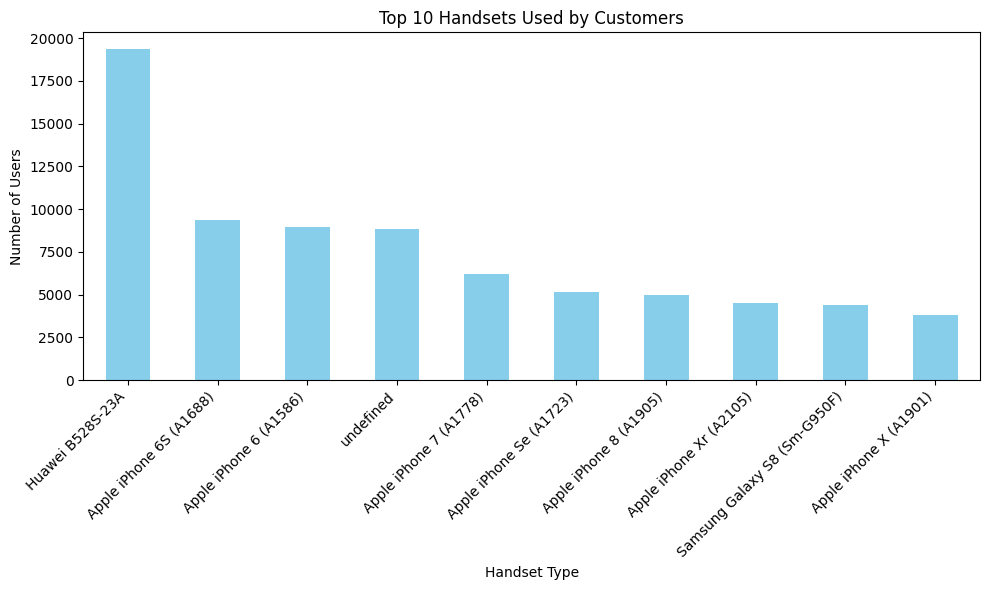

Top 3 handset manufacturers:
Handset Manufacturer
Apple      59072
Samsung    39897
Huawei     33754
Name: count, dtype: int64


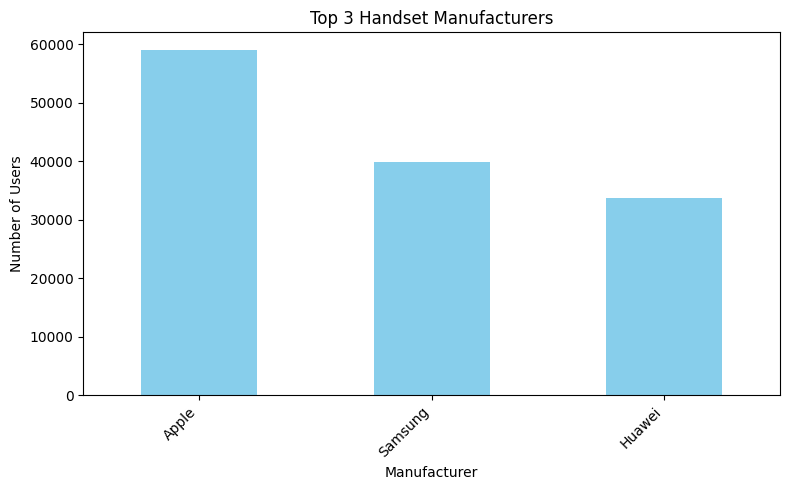

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9369
Apple iPhone 6 (A1586)     8967
Apple iPhone 7 (A1778)     6240
Apple iPhone Se (A1723)    5151
Apple iPhone 8 (A1905)     4961
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4404
Samsung Galaxy A5 Sm-A520F      3672
Samsung Galaxy J5 (Sm-J530)     3663
Samsung Galaxy J3 (Sm-J330)     3431
Samsung Galaxy S7 (Sm-G930X)    3106
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19373
Huawei E5180                       2062
Huawei P20 Lite Huawei Nova 3E     2000
Huawei P20                         1471
Huawei Y6 2018                      984
Name: count, dtype: int64




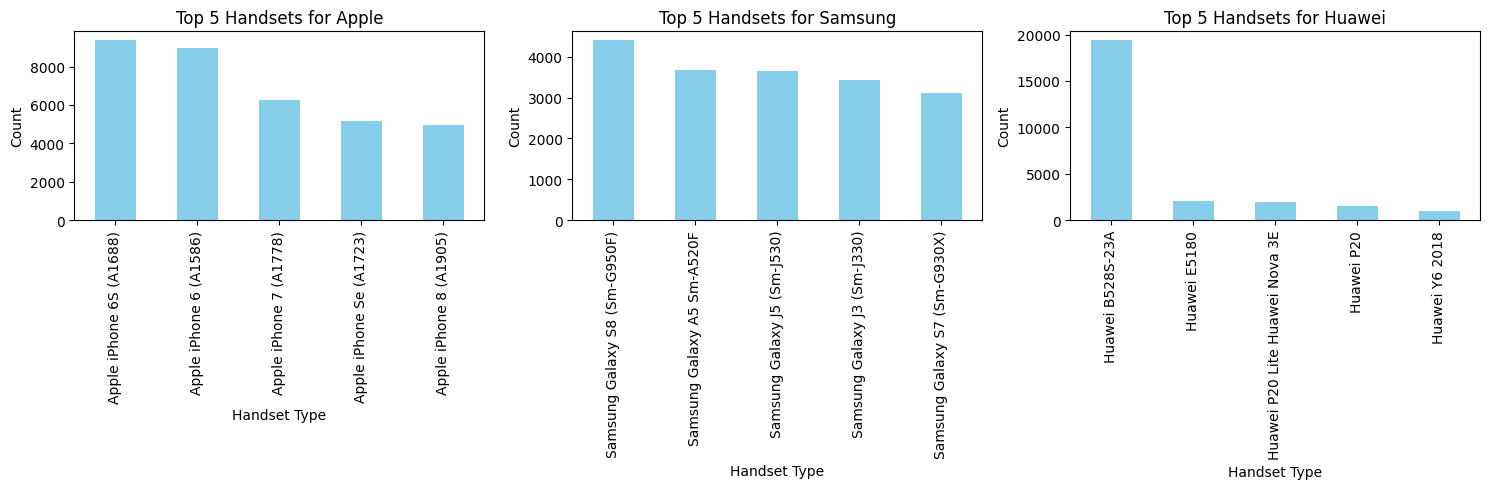

In [36]:
# Specify the path to the data file
file_path = '../data/cleaned_data.csv'

# Call the function to analyze the handsets
analyze_handsets(file_path)

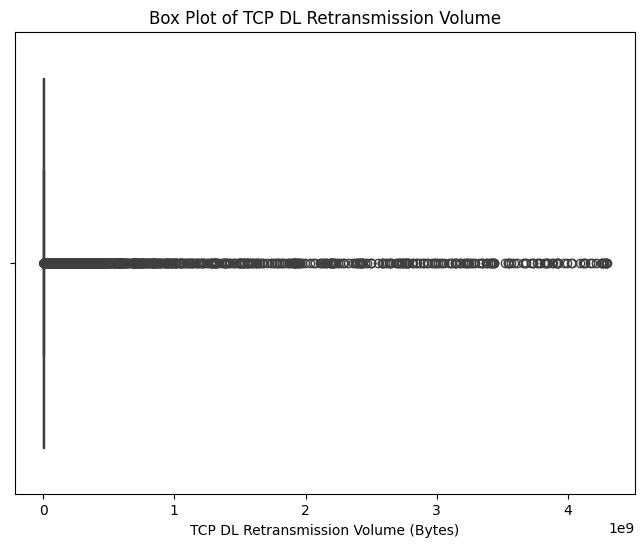

In [19]:

# Assuming you have a DataFrame named 'df' containing the relevant columns

# Create a horizontal box plot for the 'TCP DL Retrans. Vol (Bytes)' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['TCP DL Retrans. Vol (Bytes)'], orient='h')
plt.title('Box Plot of TCP DL Retransmission Volume')
plt.xlabel('TCP DL Retransmission Volume (Bytes)')
plt.show()


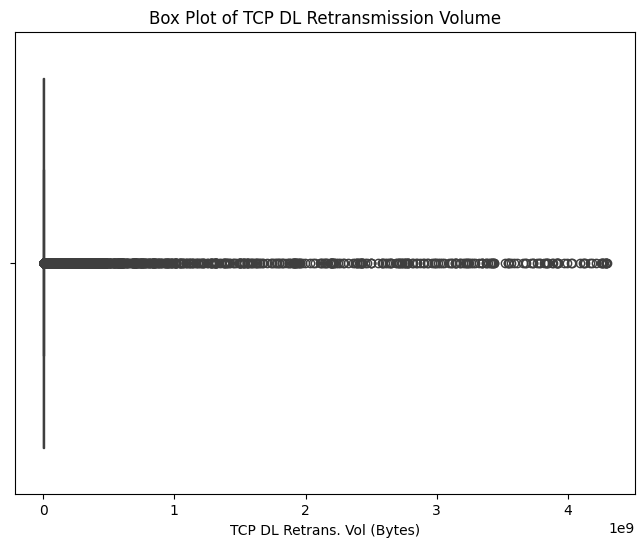

In [20]:
boxplot_for_outliers(df, 'TCP DL Retrans. Vol (Bytes)', 'Box Plot of TCP DL Retransmission Volume')

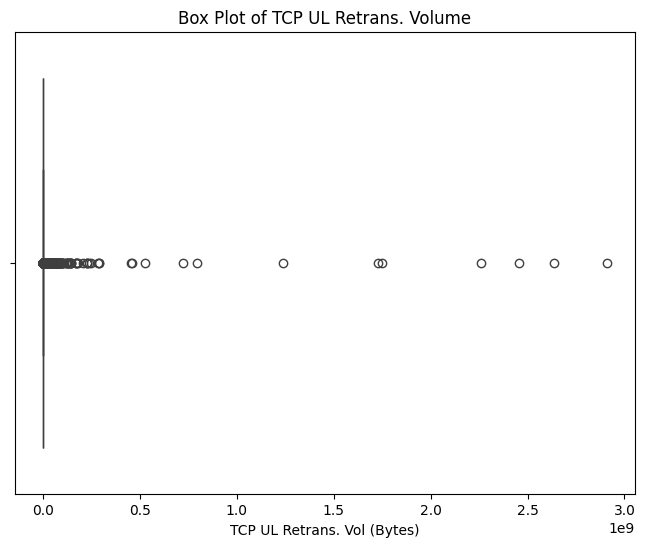

In [21]:
boxplot_for_outliers(df, 'TCP UL Retrans. Vol (Bytes)', 'Box Plot of TCP UL Retrans. Volume')

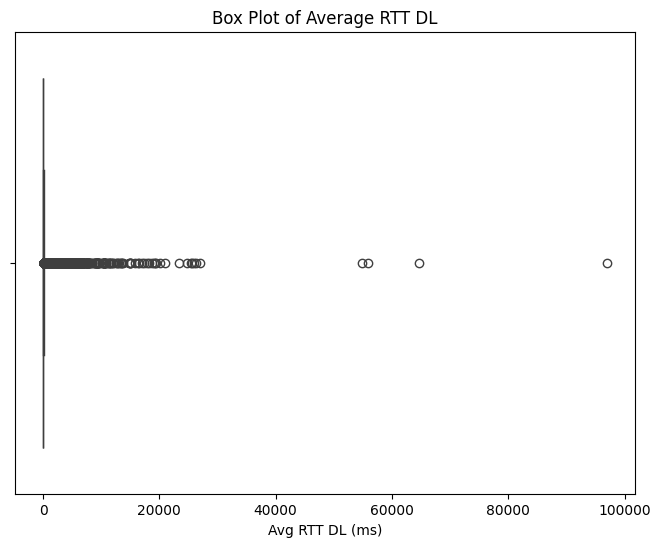

In [22]:
boxplot_for_outliers(df, 'Avg RTT DL (ms)', 'Box Plot of Average RTT DL')

In [23]:
df.shape

(150001, 55)

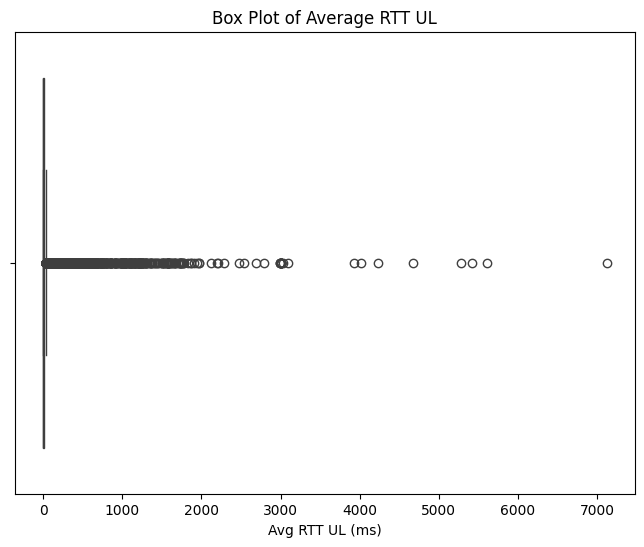

In [24]:
boxplot_for_outliers(df, 'Avg RTT UL (ms)', 'Box Plot of Average RTT UL')

In [25]:
analyzer.boxplot_for_outliers(df, 'TCP DL Retrans. Vol (Bytes)', 'Box Plot of TCP DL Retransmission Volume')

NameError: name 'analyzer' is not defined

## Handling Outliers

In [ ]:
finsl_Clean_Data=fix_outliers()